WELCOME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the excel file into pandas dataframe and inspecting the first 5 rows
cars = pd.read_csv("data\JijiCarsRawDataFinal .csv", index_col = 0)
cars.head() 

,Make,YOM,Color,Used,Transmission,Mileage,Location,Price
Model,,,,,,,,
X-Trail,Nissan,2014,Black,Foreign Used,Automatic,136000,"Nairobi, Karen","KSh 2,050,000"
Teana,Nissan,2014,Silver,Foreign Used,Automatic,85000,"Nairobi, Kilimani","KSh 1,380,000"
Teana,Nissan,2013,Gray,Foreign Used,Automatic,90231,"Nairobi, Ridgeways","KSh 995,000"
X-Trail,Nissan,2014,White,Foreign Used,Automatic,52000,"Nairobi, Jamhuri","KSh 2,500,000"
Note,Nissan,2014,White,Foreign Used,Automatic,Unavailable,"Mombasa, Mombasa CBD","KSh 1,100,000"


In [3]:
#checking the number of rows and columns
cars.shape

(46685, 8)

In [4]:
# getting some information about the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46685 entries, X-Trail to Romeo
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          46684 non-null  object
 1   YOM           46684 non-null  object
 2   Color         46684 non-null  object
 3   Used          46684 non-null  object
 4   Transmission  46684 non-null  object
 5   Mileage       46684 non-null  object
 6   Location      46684 non-null  object
 7   Price         46684 non-null  object
dtypes: object(8)
memory usage: 3.2+ MB


In [5]:
#checking the number of missing values
cars.isnull().sum()

Make            1
YOM             1
Color           1
Used            1
Transmission    1
Mileage         1
Location        1
Price           1
dtype: int64

In [6]:
# Drop rows with any missing values
cars.dropna(inplace=True)

In [7]:
cars.isnull().sum()

Make            0
YOM             0
Color           0
Used            0
Transmission    0
Mileage         0
Location        0
Price           0
dtype: int64

In [8]:
# Check for duplicates
duplicates = cars.duplicated()
duplicates_count = duplicates.sum()
print("Number of duplicate rows:", duplicates_count)

# Print the rows with duplicates
if duplicates_count > 0:
    duplicate_rows = cars[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 7656
Duplicate rows:
            Make   YOM   Color          Used Transmission      Mileage  \
Model                                                                    
Note      Nissan  2014   White  Foreign Used    Automatic  Unavailable   
Qashqai   Nissan  2015   Black  Foreign Used    Automatic  Unavailable   
Teana     Nissan  2014  Silver  Foreign Used    Automatic  Unavailable   
Teana     Nissan  2014  Silver  Foreign Used    Automatic  Unavailable   
Teana     Nissan  2014  Silver  Foreign Used    Automatic  Unavailable   
...          ...   ...     ...           ...          ...          ...   
Sorento      Kia  2015   White  Foreign Used    Automatic        92000   
Sorento      Kia  2015     Red  Foreign Used    Automatic        36656   
Cerato       Kia  2006    Gray   Kenyan Used       Manual  Unavailable   
Sportage     Kia  2012   Brown   Kenyan Used    Automatic       117590   
Romeo       Alfa  2014   Pearl  Foreign Used    Automatic  Unavai

Choosing the median as a replacement for "Unavailable" values in the "Mileage" column is a common strategy when dealing with missing or unavailable numerical data. The median is a measure of central tendency that is less sensitive to outliers than the mean.

In [9]:
# Convert the 'Mileage' column to numeric, excluding 'Unavailable' values
cars['Mileage'] = pd.to_numeric(cars['Mileage'], errors='coerce')

# Replace 'Unavailable' with the median of numeric values
cars['Mileage'].replace('Unavailable', cars['Mileage'].median(), inplace=True)



### **Analysisng Price Feature**

In [10]:
# Step 1: Remove non-numeric characters
cars['Price'] = cars['Price'].replace('[^\d.]', '', regex=True)

# Step 2: Convert to numeric
cars['Price'] = pd.to_numeric(cars['Price'], errors='coerce')

# Now, calculate the mean and fill missing values
mean_price = cars['Price'].mean()
cars['Price'].fillna(mean_price, inplace=True)

In [11]:
cars['Price'].describe()

count    4.668400e+04
mean     2.664173e+06
std      1.482037e+08
min      6.000000e+04
25%      8.000000e+05
50%      1.350000e+06
75%      2.350000e+06
max      3.202000e+10
Name: Price, dtype: float64

Skewness: Skewness measures the asymmetry of a distribution. A skewness value of 215.992234 indicates a highly skewed distribution. Specifically, a positive skewness indicates a distribution that is skewed to the right, meaning that the right tail is longer or fatter than the left.

Kurtosis: Kurtosis measures the "tailedness" of a distribution. A kurtosis value of 46663.076554 is extremely high, suggesting heavy tails or outliers in the data. High kurtosis can indicate a distribution with more extreme values (either larger or smaller) than a normal distribution.

Skewness: 215.992234
Kurtosis: 46663.076554


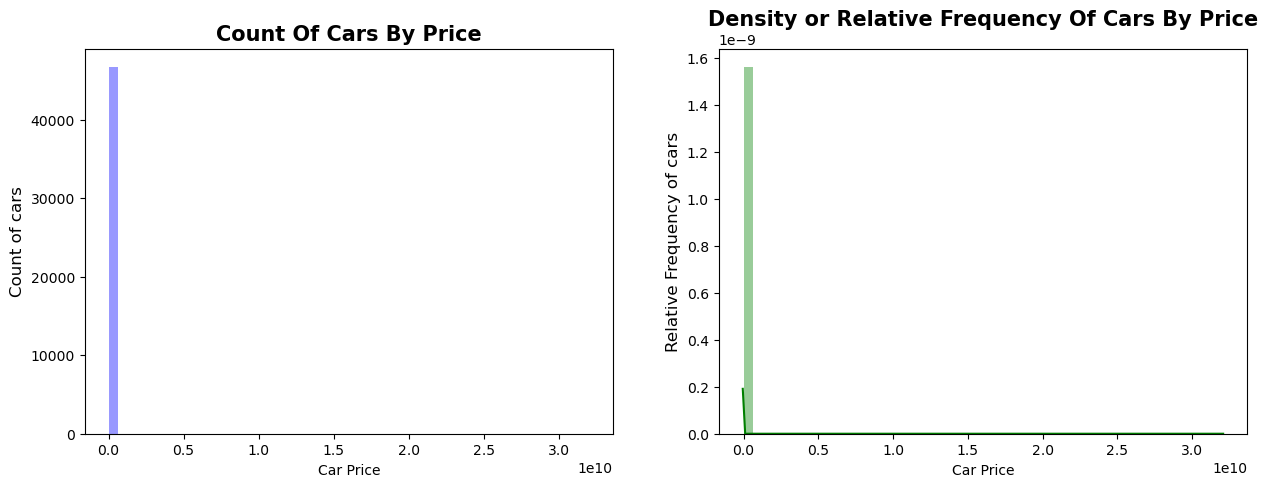

In [12]:
fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(cars['Price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(cars['Price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")
#skewness and kurtosis
print("Skewness: %f" % cars['Price'].skew())
print("Kurtosis: %f" % cars['Price'].kurt())

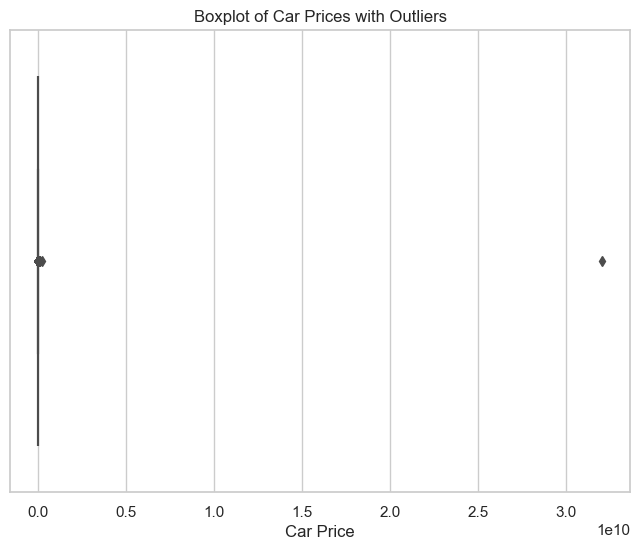

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a boxplot to visualize the distribution of car prices
sns.boxplot(x=cars['Price'])

# Show the plot
plt.title('Boxplot of Car Prices with Outliers')
plt.xlabel('Car Price')
plt.show()

### RELATIONSHIP WITH NUMERICAL FEATURES

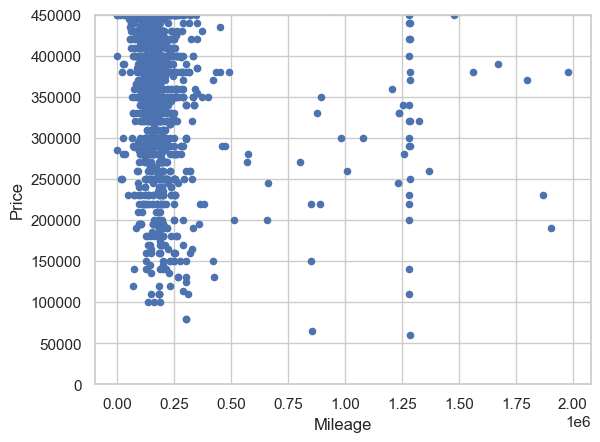

In [14]:
# Scatter plot Mileage / Price
attrib = 'Mileage'
data = pd.concat([cars['Price'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0,450000));


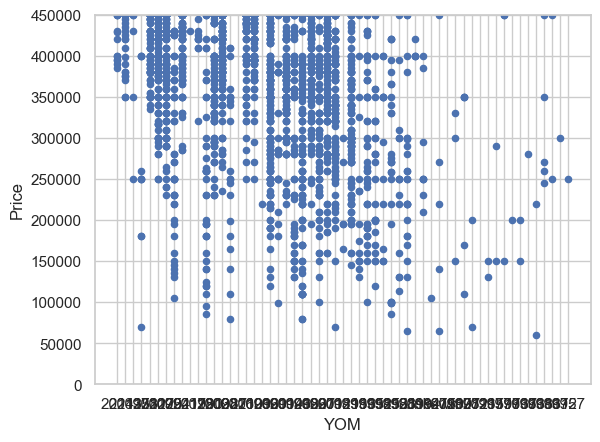

In [15]:
# Scatter plot Year / Price
attrib = 'YOM'
data = pd.concat([cars['Price'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0,450000));

In [ ]:


# Replace 'Unkown' with NaN
cars['YOM'] = pd.to_numeric(cars['YOM'], errors='coerce')

# Calculate correlation
correlation_mileage_price = cars['Mileage'].corr(cars['Price'])
correlation_yom_price = cars['YOM'].corr(cars['Price'])
print("correlation_mileage_price", correlation_mileage_price)
print("correlation_yom_price",correlation_yom_price)


correlation_mileage_price nan
correlation_yom_price nan


c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
#checking the distribution of categorical data
print(cars.Transmission.value_counts())


Transmission
Automatic             42731
Manual                 3131
CVT                     283
AMT                     195
Nairobi, Lavington       29
                      ...  
134525                    1
86000                     1
186475                    1
115437                    1
33363                     1
Name: count, Length: 240, dtype: int64


In [ ]:
print(cars.Location.value_counts())

Location
Mombasa, Mombasa CBD        11622
Nairobi, Nairobi Central     5909
Nairobi, Kilimani            5192
Mombasa, Mvita               3716
Nairobi, Ridgeways           2185
                            ...  
Nyamira, Township F             1
Nairobi, Pumwani                1
Narok, Kilgoris Central         1
Meru, Igoji East                1
Nandi, Nandi Hills              1
Name: count, Length: 281, dtype: int64


In [ ]:
print(cars.Make .value_counts())

Make
Toyota           18821
Nissan            6326
Subaru            3515
Mazda             3334
Mercedes-Benz     2197
Honda             2170
Mitsubishi        1772
Volkswagen        1693
Suzuki            1520
BMW               1361
Land Rover         985
Audi               593
Lexus              591
Ford               374
Daihatsu           313
Peugeot            266
Volvo              247
Jeep               140
KSh                109
Porsche             82
Mini                62
Hyundai             46
Kia                 41
Jaguar              40
Chevrolet           39
Bmw                 27
Alfa                10
Land                 9
TOYOTA               1
Name: count, dtype: int64


In [ ]:
print(cars.Model .value_counts())

Model
Land        2676
Hilux       1457
Note        1347
Forester    1268
Fielder     1254
            ... 
M6             1
H-Wgn          1
118d           1
CRV            1
E550           1
Name: count, Length: 641, dtype: int64


In [ ]:
print(cars.Used.value_counts())


Used
Foreign Used            28713
Kenyan Used             17053
Brand New                 574
Automatic                 237
km                        100
Manual                      5
Mombasa, Mombasa CBD        1
94871                       1
Name: count, dtype: int64


In [ ]:
print(cars.Color.value_counts())

Color
White        11324
Black         9303
Silver        8193
Blue          4038
Gray          3841
             ...  
720,000          1
1988             1
2,474,998        1
2,306,248        1
Coupe            1
Name: count, Length: 178, dtype: int64


## Encoding the Categorical data

In [ ]:
#encoding transmission column
cars.replace({'Transmission':{'Automatic': 0, 'Manual': 1, 'CVT': 2, 'AMT': 3}}, inplace = True)
#encoding used column
cars.replace({'Used':{'Foreign Used': 0, 'Kenyan Used': 1, 'Brand New': 2}}, inplace = True)
#encoding color column
cars.replace({'Color':{'White': 0, 'Black': 1, 'Silver': 2, 'Blue': 3, 'Gray': 4}}, inplace = True)

In [ ]:
cars.head()

,Model,Make,YOM,Color,Used,Transmission,Mileage,Location,Price
0,X-Trail,Nissan,2014,1,0,0,136000,"Nairobi, Karen","KSh 2,050,000"
1,Teana,Nissan,2014,2,0,0,85000,"Nairobi, Kilimani","KSh 1,380,000"
2,Teana,Nissan,2013,4,0,0,90231,"Nairobi, Ridgeways","KSh 995,000"
3,X-Trail,Nissan,2014,0,0,0,52000,"Nairobi, Jamhuri","KSh 2,500,000"
4,Note,Nissan,2014,0,0,0,Unavailable,"Mombasa, Mombasa CBD","KSh 1,100,000"


## Splitting the dataset into data and target

In [ ]:
X = cars.drop(['Make','Price'], axis = 1)
Y = cars['Price']

In [ ]:
print("x", X)
print("y", Y)

x          Model   YOM Color Used Transmission      Mileage  \
0      X-Trail  2014     1    0            0       136000   
1        Teana  2014     2    0            0        85000   
2        Teana  2013     4    0            0        90231   
3      X-Trail  2014     0    0            0        52000   
4         Note  2014     0    0            0  Unavailable   
...        ...   ...   ...  ...          ...          ...   
46680    Romeo  2015     1    0            0  Unavailable   
46681    Romeo  2016     0    0            0        75048   
46682    Romeo  2002   Red    1            0        72000   
46683    Romeo  1992     3    1            1       150000   
46684    Romeo  1987   Red    1            1  Unavailable   

                     Location  
0              Nairobi, Karen  
1           Nairobi, Kilimani  
2          Nairobi, Ridgeways  
3            Nairobi, Jamhuri  
4        Mombasa, Mombasa CBD  
...                       ...  
46680       Nairobi, Kilimani  
46681    

### splitting data into train and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

## Model Training
**Linear Regresion**

In [ ]:
lin_regModel = LinearRegression()
lin_regModel.fit(X_train, Y_train)

# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

ValueError: could not convert string to float: 'X-Trail'

## **Visualize the actual prices and predicted price**

In [ ]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


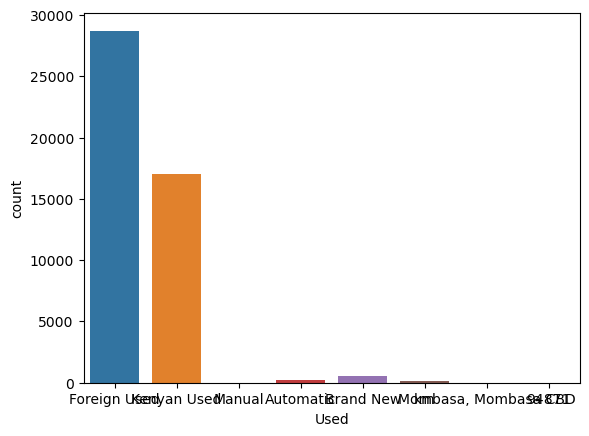

In [ ]:
sns.countplot(data=cars, x='Used')
plt.show()